In [271]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import sympy as sym
import warnings
from IPython.display import display, Math
from numpy.lib.scimath import sqrt as csqrt
from scipy import signal

# Filtro FIR (Lowpass)

### Functions and signal parameters

In [272]:
def f(x):
    return np.cos(2*60*np.pi*x) + 2*np.cos(2*600*np.pi*x) # Function

def hdSin(x, wc, M):
    return np.sin(wc*(x-M))/(np.pi*(x-M))

SPoints = 160


Text(0.5, 1.0, 'Function Y')

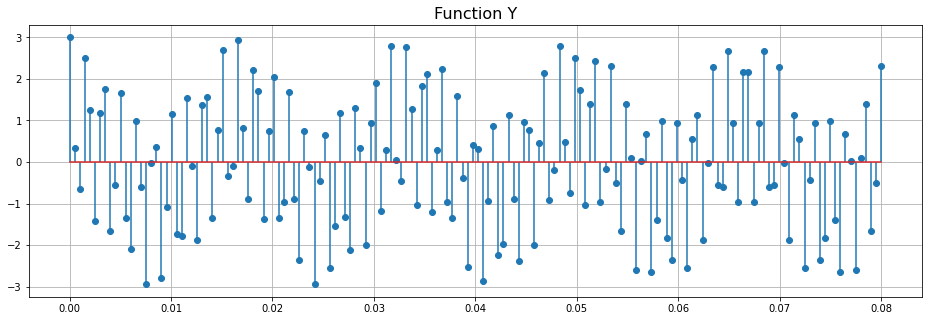

In [273]:
Lims = [0,8e-2]   # Sample limits
Fs = 2000 # Sample frequency

SPoints = int(Fs*(Lims[1] - Lims[0]))    # Sample points
print(f"SPoints = {SPoints}")
Xs = np.linspace(Lims[0],Lims[1],SPoints)
Ys = f(Xs)

plt.figure(figsize=(16,5))
plt.grid(True)
plt.stem(Xs,Ys)
plt.title("Function Y", fontsize=16)

### Window parameters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-110.0, 10.0)

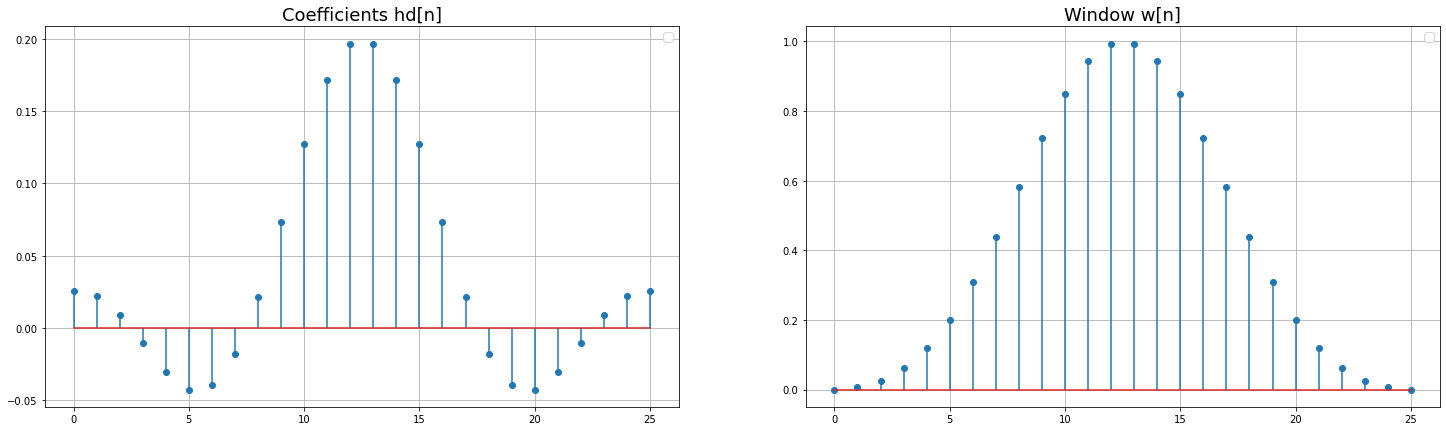

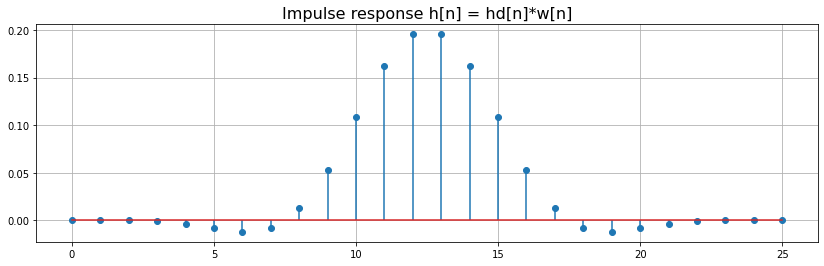

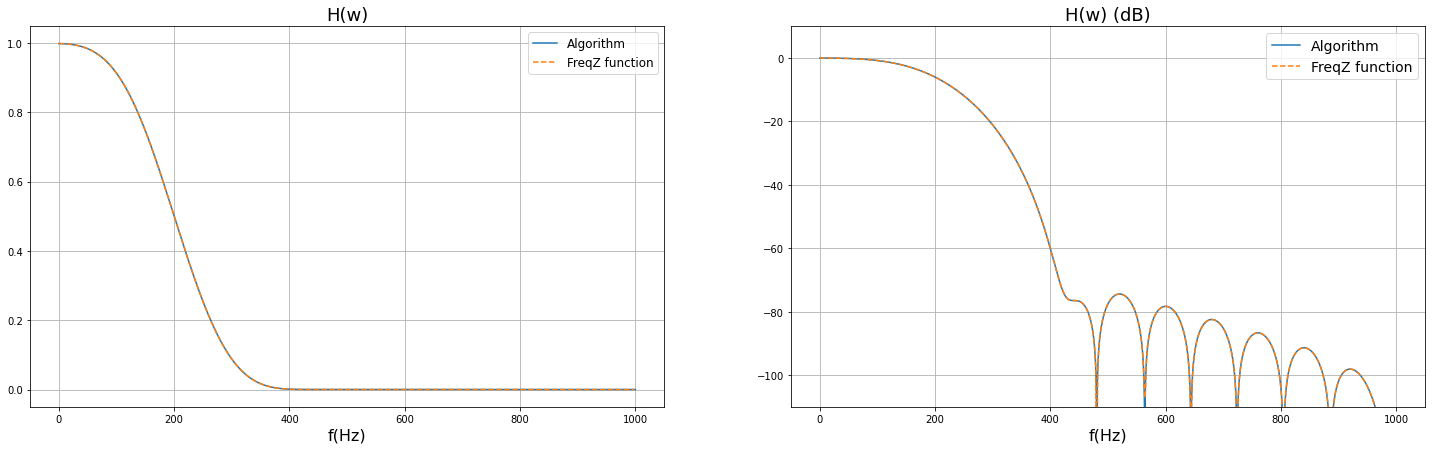

In [274]:
FOrder = 25 # Filter order
CutF = 200 # Cutoff frequency (Hz)

wc = 2*np.pi*CutF/Fs
w = np.ones(FOrder+1)   # Rectangular window
for n in range(FOrder+1):
    w[n] = 0.42 - 0.5*np.cos(2*np.pi*n/(FOrder)) + 0.08*np.cos(4*np.pi*n/(FOrder))  # Blackman window
hd = np.zeros(FOrder+1)

for i in range(FOrder+1): # Window inverse transform
    if(i == FOrder/2):
        hd[i] = wc/np.pi
    else:
        hd[i] = hdSin(i,wc,FOrder/2) 

figure, ax = plt.subplots(1,2,figsize=(25,7))
ax[0].grid(True)
ax[0].stem(np.arange(0,len(hd),1),hd)
ax[0].set_title("Coefficients hd[n]", fontsize=18)
ax[0].legend(fontsize=12)

ax[1].grid(True)
ax[1].grid(True)
ax[1].stem(np.arange(0,len(w),1),w)
ax[1].set_title("Window w[n]", fontsize=18)
ax[1].legend(fontsize=12)

h = np.multiply(w,hd)

plt.figure(figsize=(14,4))
plt.grid(True)
plt.stem(np.arange(0,len(h),1),h)
plt.title("Impulse response h[n] = hd[n]*w[n]", fontsize=16)

FreqPoints = 10000  # Frequency points for calculing H(n)

NormW = np.linspace(0, 0.5*2*np.pi, FreqPoints)
HArray = np.zeros(FreqPoints, dtype=complex)  # H(z) array
for j in range(len(NormW)):  # Z Transform loop
    HResp = 0
    for i in range(len(h)):
        HResp = HResp + h[i]*np.exp(-1j*NormW[j]*i)
    HArray[j] = HResp
    
w , H = signal.freqz(h,fs=Fs) # FreqZ function calculation

figure, ax = plt.subplots(1,2,figsize=(25,7))
ax[0].grid(True)
ax[0].plot(Fs*NormW/(2*np.pi),np.abs(HArray), label="Algorithm")
ax[0].plot(w,np.abs(H), "--", label="FreqZ function")
ax[0].set_title("H(w)", fontsize=18)
ax[0].set_xlabel("f(Hz)", fontsize=16)
ax[0].legend(fontsize=12)

ax[1].grid(True)
ax[1].plot(Fs*NormW/(2*np.pi),20*np.log10(np.abs(HArray)), label="Algorithm")
ax[1].plot(w,20*np.log10(np.abs(H)), "--", label="FreqZ function")
ax[1].set_title("H(w) (dB)", fontsize=18)
ax[1].set_xlabel("f(Hz)", fontsize=16)
ax[1].legend(fontsize=14)
ax[1].set_ylim((-110,10))

### Output Signal

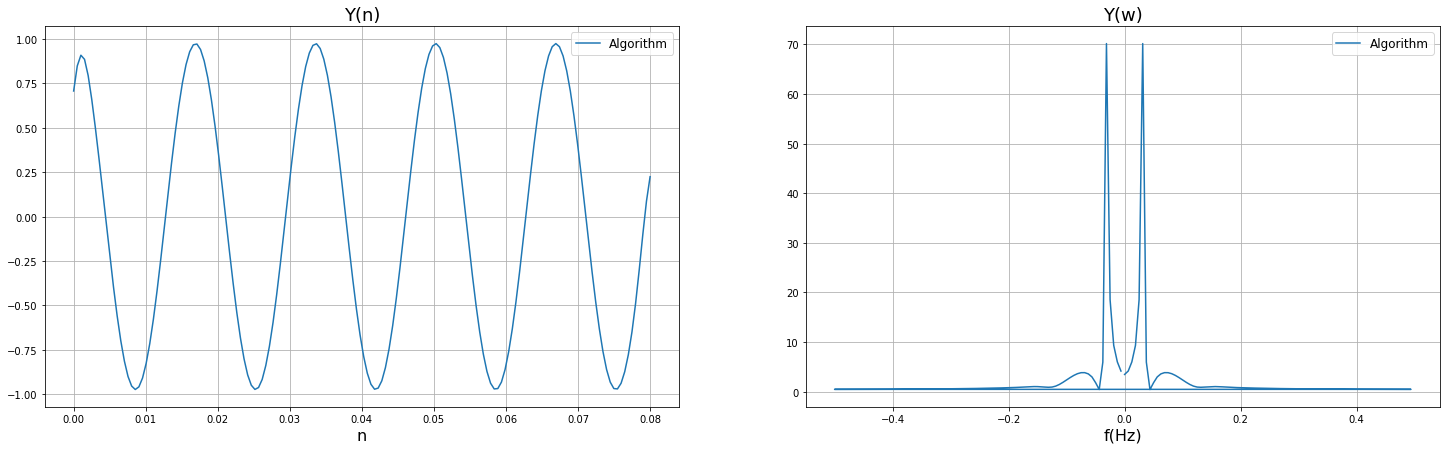

In [275]:
con = np.convolve(Ys,h)  # Convolving x[n] and h[n]
conLen1 = int(len(con)/2 -SPoints/2)
conLen2 = int(len(con)/2 +SPoints/2)
figure, ax = plt.subplots(1,2,figsize=(25,7))
ax[0].grid(True)
ax[0].plot(Xs,con[conLen1 : conLen2], label="Algorithm")
ax[0].set_title("Y(n)", fontsize=18)
ax[0].set_xlabel("n", fontsize=16)
ax[0].legend(fontsize=12)

ax[1].grid(True)
ax[1].plot(np.fft.fftfreq(SPoints),np.abs(np.fft.fft(con[0:SPoints])), label="Algorithm")
ax[1].set_title("Y(w)", fontsize=18)
ax[1].set_xlabel("f(Hz)", fontsize=16)
ax[1].legend(fontsize=12)

# Filtro IIR (Lowpass)

### Filter design

Order(N) by algorithm = 5, Sample frequency(Fs) by algorithm = 2000
Cutoff by algorithm = 0.11013545410155696
Num = 5, Wcut = 0.1051265716973295
Cutoff Analog equivalent = 0.16664997072506071


(-300.0, 40.0)

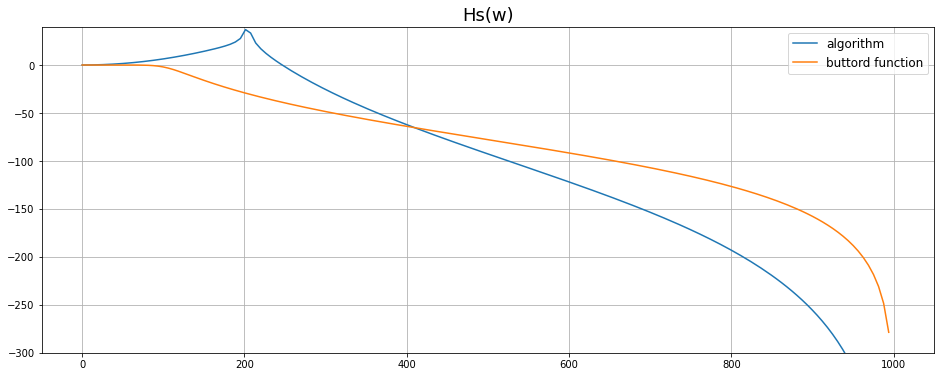

In [276]:
# ALGORTIHM METHOD -----------------------------------------------------
wp = 0.08*np.pi # Passband edge (normalized in Fs/2 and multiplied by pi)
ws = 0.12*np.pi # Stopband edge (normalized in Fs/2 and multiplied by pi)
AttS = 10 # Stopband attenuation (in dB)
AttP = 1 # Passband attenuation (in dB)

OmegaS = (np.tan(ws/2) / np.tan(wp/2))  # Normalized ws
OmegaC = OmegaS/((10**(np.abs(AttS)/10)-1)**(1/4))  # Normalized wp
N = int( np.ceil((np.log10((10**(np.abs(AttS)/10)-1) / (10**(np.abs(AttP)/10)-1))) / (2*np.log10(OmegaS))) ) # Order number calculation
print(f'Order(N) by algorithm = {N}, Sample frequency(Fs) by algorithm = {Fs}')
print(f'Cutoff by algorithm = {np.tan(wp/2) * OmegaC}')

sk = np.zeros(N, dtype=complex)
for i in range(N):
    sk[i] = np.exp(1j*np.pi/2 * (2*i+1+N)/N)  # sk solutions

FPoints = SPoints  # Frequency points
FRange = np.linspace(0, 0.5*2*np.pi, FPoints)
HsArray = np.ones(FPoints, dtype=complex)  # H(s) expression
for i in range(FPoints):  # Forming H(z)
    for j in range(N):
        ParameterS = ((1-np.exp(-1j*FRange[i]))/(1+np.exp(-1j*FRange[i])))**2
        HsArray[i] = HsArray[i] * 1/(ParameterS/(OmegaC*np.tan(wp/2)) - sk[j])



# BUTTORD FUNCTION METHOD ----------------------------------------------
Num, Wcut = signal.buttord(ws/np.pi, wp/np.pi, AttP, AttS, analog=False)  # Buttord function: Getting Order number and wp
print(f'Num = {Num}, Wcut = {Wcut}')
print(f'Cutoff Analog equivalent = {np.tan(Wcut * np.pi/2)}')

[b,a] = signal.butter(Num,Wcut,btype='lowpass')  # Getting polynomial coefficients
[w,h] = signal.freqz(b,a,worN=FPoints)  # Calculating H(w) using the polynomial coefficients
w = Fs*w/(2*np.pi)  # Normalization

h_db = 20*np.log10(abs(h))

plt.figure(figsize=(16,6))
plt.grid(True)
plt.title('Hs(w)', fontsize=18)
plt.plot(Fs*FRange/(2*np.pi),20*np.log10(abs(HsArray)), label='algorithm')
plt.plot(w, h_db, label='buttord function')
plt.legend(fontsize=12)
plt.ylim((-300,40))

### Output Signal

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


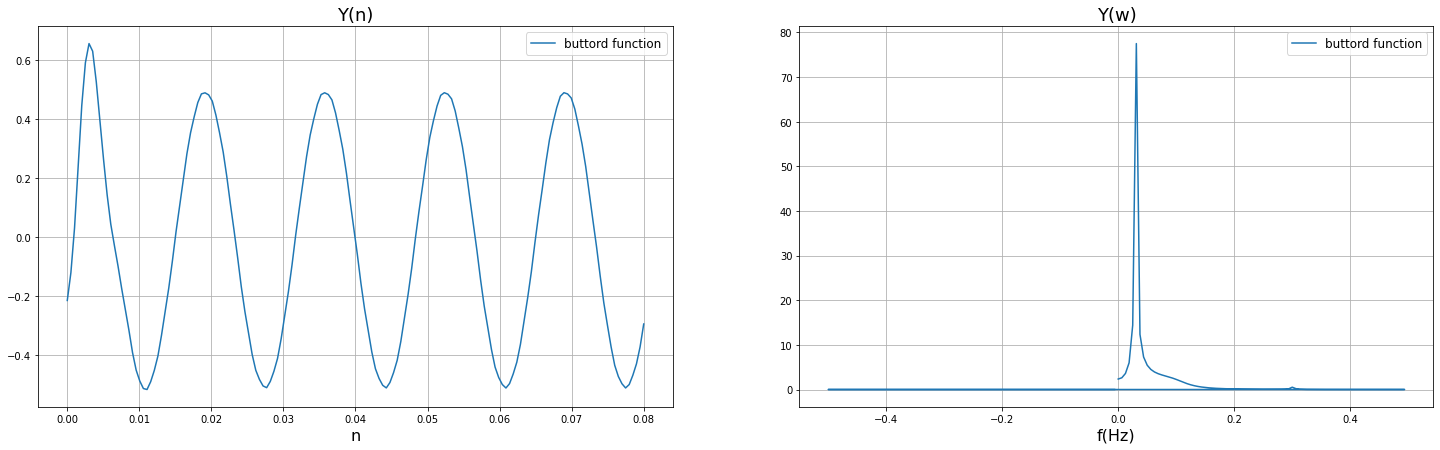

In [277]:
mult = np.fft.fft(Ys)*h
mult2 = np.fft.fft(Ys)*HsArray
figure, ax = plt.subplots(1,2,figsize=(25,7))
ax[0].grid(True)
ax[0].plot(Xs,np.fft.ifft(mult), label='buttord function')
ax[0].set_title("Y(n)", fontsize=18)
ax[0].set_xlabel("n", fontsize=16)
ax[0].legend(fontsize=12)

ax[1].grid(True)
ax[1].plot(np.fft.fftfreq(SPoints),np.abs(mult), label='buttord function')
ax[1].set_title("Y(w)", fontsize=18)
ax[1].set_xlabel("f(Hz)", fontsize=16)
ax[1].legend(fontsize=12)